# Project - Glass Classification

### Using K - Nearest Neighbor Algorithm
### Computer Science Engeneering
### June 7 2019 
### Team P. Sudarshan Kumar

## Mission 1: Introduction to the Data Set

### Instructions

        ● Read glass.data into a dataframe.Read in the file using pandas.read_csv() 
        
        ● Determine which columns are numeric and can be used as features and which column is
        the target column and which columns can be converted into numeric.
      

In [8]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import operator
def read(filename):
    df = pd.read_csv(filename)
    return df
df = read('Data Files/glass.csv')
rand = np.random.permutation(df.index)
df = df.loc[rand]
df.head(7)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
150,1.51665,13.14,3.45,1.76,72.48,0.60,8.38,0.00,0.17,3
123,1.51707,13.48,3.48,1.71,72.52,0.62,7.99,0.00,0.00,2
205,1.51732,14.95,0.00,1.80,72.99,0.00,8.61,1.55,0.00,7
69,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.00,0.03,1
99,1.51811,12.96,2.96,1.43,72.92,0.60,8.79,0.14,0.00,2
37,1.51797,12.74,3.48,1.35,72.96,0.64,8.68,0.00,0.00,1
83,1.51594,13.09,3.52,1.55,72.87,0.68,8.05,0.00,0.09,2


## Mission 2: Data Cleaning

### Instructions

        ● Use the DataFrame.replace() method to replace any and all of the non-null values with the
        numpy.nan missing value.
        
        ● Determine which columns need to be converted to numeric types. You can use either the
        DataFrame.astype() or the Series.astype() methods to convert column types.
        
        ● Return the number of rows that have a missing value for the normalized-losses column.
        This can be determined using Dataframe.info(). Determine how you should handle this column. 
        You could:
        
            ○ Replace the missing values using the average values from that column.

            ○ Drop the rows entirely (especially if other columns in those rows have missing
            values).

            ○ Drop the column entirely.

        ● Explore the missing value counts for the other numeric columns and handle any
        missing values.
        
        ● Of the columns we decided to keep, normalize the numeric ones so all values range
        from 0 to 1.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214 entries, 179 to 38
Data columns (total 10 columns):
RI      214 non-null float64
Na      214 non-null float64
Mg      214 non-null float64
Al      214 non-null float64
Si      214 non-null float64
K       214 non-null float64
Ca      214 non-null float64
Ba      214 non-null float64
Fe      214 non-null float64
Type    214 non-null int64
dtypes: float64(9), int64(1)
memory usage: 18.4 KB


In [43]:
normalized_listings = (df - df.mean()) / (df.std())
df_norm = normalized_listings
columns = df_norm.columns
columns = columns.to_list()
columns.pop()
df_norm.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
150,-0.564866,-0.328006,0.530687,0.631109,-0.220690,0.157843,-0.405411,-0.352051,1.159608,0.104398
123,-0.426565,0.088353,0.551486,0.530962,-0.169047,0.188509,-0.679451,-0.352051,-0.585079,-0.370946
205,-0.344243,1.888492,-1.861147,0.711226,0.437760,-0.762132,-0.243798,2.765286,-0.585079,2.005775
69,1.526107,-0.119826,0.620814,-1.251641,-0.853319,-0.578137,0.852359,-0.352051,-0.277193,-0.846290
99,-0.084107,-0.548431,0.190977,-0.029857,0.347385,0.157843,-0.117319,-0.070485,-0.585079,-0.370946


## Mission 3: Univariate Model

### Instructions
        ● Create a function, named knn_train_test() that consists of the training and simple
        validation process. This function should have 3 parameters -- training column name,
        target column name, and the dataframe object.

            ○ This function should split the data set into a training and test set.

            ○ Then, it should instantiate the KNeighborsRegressor class, fit the model on the
            training set, and make predictions on the test set.

            ○ Finally, it should calculate the RMSE and return that value.

        ● Use this function to train and test univariate models(model having only one column for prediction) 
        using the different numeric columns in the data set. Which column performed the best using the default
        k value?
        
        ● Modify the knn_train_test() function to accept a parameter for the k value.
        
            ○ Update the function logic to use this parameter.

            ○ For each numeric column, create, train, and test a univariate model using the
            following k values (1, 3, 5, 7, and 9) and print the rmse values for each model.

In [53]:
rmse_values = []
def knn_train_test(training_col,target_col,dataframe):
    train_df, test_df = train_test_split(dataframe, test_size= 0.2, random_state = 0)
    knn = KNeighborsRegressor(algorithm='brute')
    train_features = train_df[[training_col]]
    train_target = train_df[[target_col]]
    knn.fit(train_features, train_target)
    predictions = knn.predict(test_df[[training_col]])
    rmse_value = np.sqrt(mean_squared_error(test_df[[target_col]], predictions))
    return rmse_value
for col in columns:
    rmse_values.append(knn_train_test(col,'Type',df_norm)) 
       
dictionary = dict(zip(columns, rmse_values))    
tups = sorted(dictionary.items(), key= operator.itemgetter(1))    
dictionary = dict(tups)
best_features = list(dictionary.keys())
dictionary

{'Mg': 0.6367516757498686,
 'K': 0.7803298680277897,
 'Ba': 0.7865007005712804,
 'Al': 0.7983045070995736,
 'Na': 0.8373692405859716,
 'RI': 0.9278632133238232,
 'Ca': 1.0183652124861269,
 'Si': 1.1147338662653834,
 'Fe': 1.1422991059429923}

In [75]:
def knn_train_test(training_col,target_col,dataframe,k):
    train_df, test_df = train_test_split(dataframe, test_size= 0.2, random_state = 0)
    knn = KNeighborsRegressor(n_neighbors = k,algorithm='brute')
    train_features = train_df[[training_col]]
    train_target = train_df[[target_col]]
    knn.fit(train_features, train_target)
    predictions = knn.predict(test_df[[training_col]])
    rmse_value = np.sqrt(mean_squared_error(test_df[target_col], predictions))
    return rmse_value


In [76]:
k_list  = [1,3,5,7,9]
for i in k_list:
    print('For',i,' as k value: \n')
    for col in columns:
        print(knn_train_test(col,'Type',df_norm,i))
    print('\n')

For 1  as k value: 

1.0070537282009477
0.8758917081092925
0.9725461963188082
1.092161632325086
1.1346372290386095
0.9616794173026916
1.2471533069273262
1.4333833841143229
1.2020992716283645


For 3  as k value: 

1.056566110064784
0.8028552822207828
0.7648681788233993
0.8587255951280476
1.2096041431234006
0.8422497123660158
1.0038599502252887
0.7451487733131077
1.027145123565813


For 5  as k value: 

0.9278632133238232
0.8373692405859716
0.6367516757498686
0.7983045070995736
1.1147338662653834
0.7803298680277897
1.0183652124861269
0.7865007005712804
1.1422991059429923


For 7  as k value: 

0.8989128224112746
0.7274774328588396
0.67024121030722
0.8133609769625255
1.0726938928299268
0.7507643212365365
0.9540664686441016
0.7583677315674198
0.9161648258837556


For 9  as k value: 

0.8806559382362935
0.7306870245367056
0.7048377540609446
0.8206764854619149
1.0289435636240523
0.7764427627339476
0.9069304397341443
0.7642317961698936
0.8389311730826401




## Mission 4: Multivariate Model

### Instructions
    ● Modify the knn_train_test() function to accept a list of column names (instead of just
    one column name as a string). Modify the rest of the function logic to use this parameter:
    
        ○ Instead of using just a single column for train and test, use all of the columns of
        the dataframe except for the target column.

        ○ Use the default k value from scikit-learn for this step(default value is 5).

    ● Use the best 2 features from the previous step to train and test a multivariate k-nearest
    neighbors model using the default k value.
    
    ● Use the best 3 features from the previous step to train and test a multivariate k-nearest
    neighbors model using the default k value.
    
    ● Use the best 4 features from the previous step to train and test a multivariate k-nearest
    neighbors model using the default k value.
    
    ● Use the best 5 features from the previous step to train and test a multivariate k-nearest
    neighbors model using the default k value.
    
    ● Display all of the RMSE values from the above steps.

In [78]:
def knn_train_test(training_col,target_col,dataframe):
    train_df, test_df = train_test_split(dataframe, test_size= 0.2, random_state = 0)
    knn = KNeighborsRegressor(algorithm='brute')
    train_features = train_df[training_col]
    train_target = train_df[[target_col]]
    knn.fit(train_features, train_target)
    predictions = knn.predict(test_df[training_col])
    rmse_value = np.sqrt(mean_squared_error(test_df[target_col], predictions))
    return rmse_value

print('All Features: ',knn_train_test(columns,'Type',df_norm))
print('Best 2 Features: ',knn_train_test(best_features[:2],'Type',df_norm))
print('Best 3 Features: ',knn_train_test(best_features[:3],'Type',df_norm))
print('Best 4 Features: ',knn_train_test(best_features[:4],'Type',df_norm))
print('Best 5 Features: ',knn_train_test(best_features[:5],'Type',df_norm))

All Features:  0.48670514897600603
Best 2 Features:  0.5650447832668334
Best 3 Features:  0.5558564508620003
Best 4 Features:  0.5432347415620109
Best 5 Features:  0.4858406631266415


## Mission 5: Hyperparameter Tuning

### Instructions
    ● For the best model from the last step, vary the hyperparameter value from 1 to 25 and plot the
    resulting RMSE values.
    
    ● Observe which k value is optimal for the model(least root mean squared error value for k is the optimal value).

In [80]:
rmse_values = []
def knn_train_test(training_col,target_col,dataframe,i):
    for i in range (1,i+1):
        train_df, test_df = train_test_split(dataframe, test_size= 0.2, random_state = 0)
        knn = KNeighborsRegressor(n_neighbors = i,algorithm='brute')
        train_features = train_df[training_col]
        train_target = train_df[[target_col]]
        knn.fit(train_features, train_target)
        predictions = knn.predict(test_df[training_col])
        rmse_values.append(np.sqrt(mean_squared_error(test_df[target_col], predictions))) 
    return rmse_values

Text(0, 0.5, 'rmse_values')

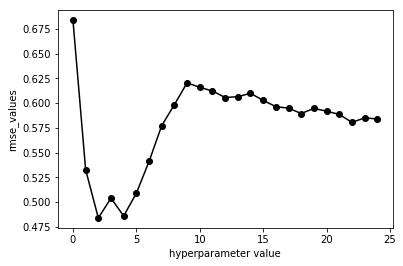

In [81]:
li = knn_train_test(best_features[:5],'Type',df_norm,25)
plt.plot(li, '-ok')
plt.xlabel('hyperparameter value')
plt.ylabel('rmse_values')

## Mission 6: K-fold cross validation

### Instructions

    ● Modify the knn_train_test() function to use k-fold cross validation instead of
    test/train validation.

In [83]:
num_folds = 5
chunks = np.array_split(df_norm, num_folds)
for i in range(0,len(chunks)):
    chunks[i]['Fold'] = i
result = pd.concat(chunks)
def train_and_validate(result,folds):
    rmses = []
    for i in range (0,folds):
        model = KNeighborsRegressor()
        train_iteration_one = result[result["Fold"] != i]
        test_iteration_one = result[result["Fold"] == i].copy()
        model.fit(train_iteration_one[best_features[:4]], train_iteration_one["Type"])
        test_iteration_one["predicted_Type"] = model.predict(test_iteration_one[best_features[:4]])
        iteration_one_mse = mean_squared_error(test_iteration_one["Type"],test_iteration_one["predicted_Type"])
        rmses.append(iteration_one_mse ** (1/2))
    return rmses
rmses = train_and_validate(result,num_folds)
avg_rmse = np.mean(rmses)
print('rmses: ',rmses,'\n','average rmse: ',avg_rmse)

rmses:  [0.4648368399259295, 0.5253350115282207, 0.8194819911515256, 0.5516813006225434, 0.44470429203961326] 
 average rmse:  0.5612078870535664
